In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table, vstack
from matplotlib import pyplot as plt
from glob import glob
from astropy.stats import LombScargle
from scipy import stats
import warnings
from TESStools import *
import celerite
from celerite import terms
from scipy.optimize import minimize

In [2]:
tic = 404850274

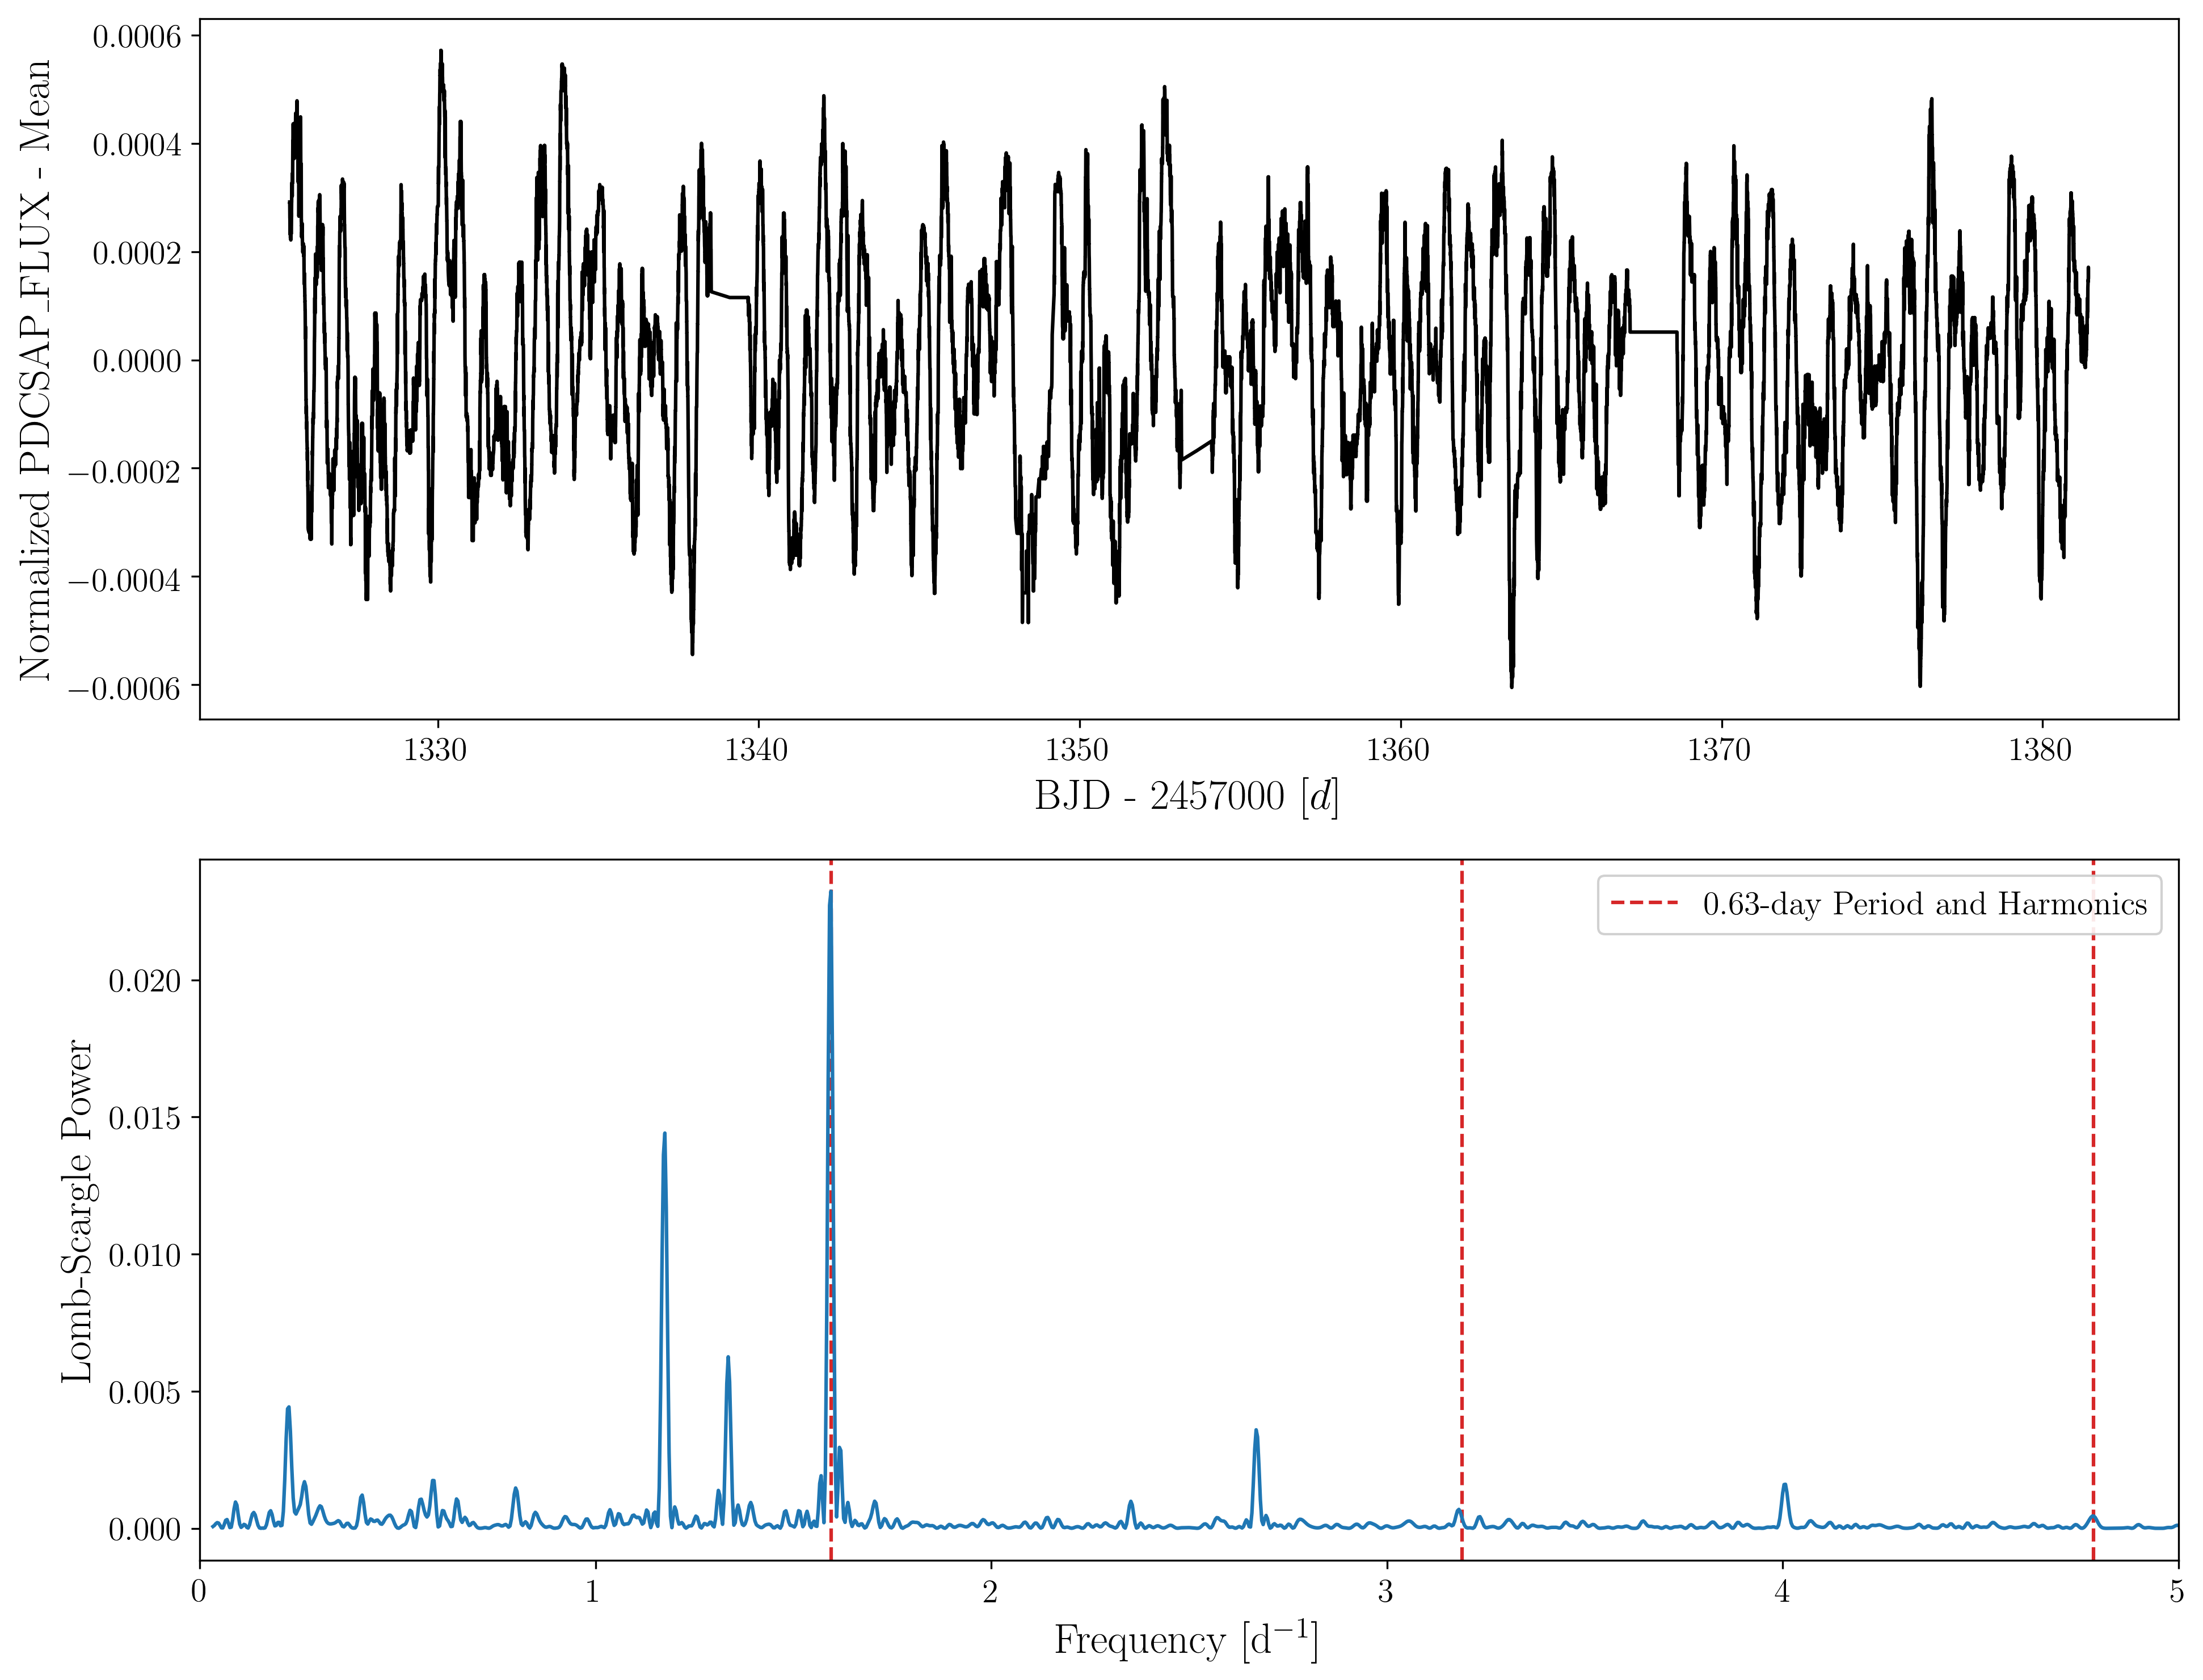

In [5]:
fig, ax = plt.subplots(2, figsize=(15,12),dpi=300)
lc, lc_smooth = lc_extract(get_lc_from_id(tic), smooth=128)
ax[0].plot(lc_smooth['Time'],lc_smooth['Flux']-np.mean(lc_smooth['Flux']),c='k')
ax[0].set(xlabel='BJD - 2457000 [$d$]', ylabel='Normalized PDCSAP\_FLUX - Mean')
time, flux = lc['Time'], lc['Flux']
ls = LombScargle(time, flux)
f, p = ls.autopower(minimum_frequency=1.0/30.0,
                    maximum_frequency=1.0/0.1) 

ax[1].plot(f, p)
fs, ps = peak_finder(f, p, 10, width=10)

dom = fs[np.argmax(ps)]
dp = 1.0/dom

for i in np.arange(1,6):
    if i == 1:
        ax[1].axvline(x=(i*dom), ls='--', c='C3', zorder=-1, label='{0:.2f}-day Period and Harmonics'.format(dp))
    else: 
        ax[1].axvline(x=(i*dom), ls='--', c='C3',zorder=-1)        

ax[1].legend(loc=1, framealpha=0.9, prop={'size': 14})
ax[1].set(xlabel='Frequency [d$^{-1}$]', ylabel='Lomb-Scargle Power', xlim=(0,5))

for a in ax:
    a.xaxis.label.set_size(18)
    a.yaxis.label.set_size(18)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
        
plt.savefig('../plots/HD269953_lcperiod.pdf')

In [4]:
dom

1.595114490556009